In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

merge_table = pd.merge(ride_data, city_data, on="city", how="left")
merge_table.head()

# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

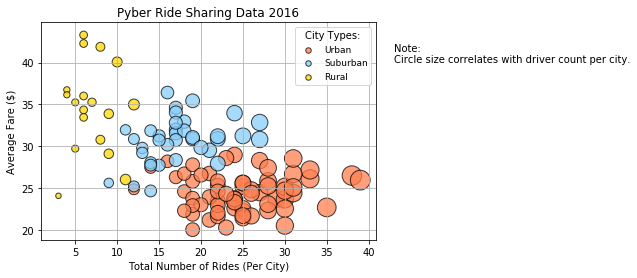

In [2]:
# Obtain the x and y coordinates for each of the three city types
urban = merge_table[merge_table["type"] == "Urban"].groupby([merge_table["city"]])
rural = merge_table[merge_table["type"] == "Rural"].groupby([merge_table["city"]])
suburban = merge_table[merge_table["type"] == "Suburban"].groupby([merge_table["city"]])

# Build the scatter plots for each city types

#Urban calculations: 
Utotal_rides = urban["ride_id"].count() 
Uavg_fare = urban["fare"].mean() 
Utotal_drivers = urban["driver_count"].count() 
# Rural calculations: 
Rtotal_rides = rural["ride_id"].count() 
Ravg_fare = rural["fare"].mean() 
Rtotal_drivers = rural["driver_count"].count() 
# Suburban calculations: 
Stotal_rides = suburban["ride_id"].count() 
Savg_fare = suburban["fare"].mean() 
Stotal_drivers = suburban["driver_count"].count() 
# Build the scatter plots for each city types
plt.scatter(Utotal_rides,Uavg_fare, label = "Urban", s=Utotal_drivers * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o") 
plt.scatter(Stotal_rides, Savg_fare, label = "Suburban", s=Stotal_drivers * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o") 
plt.scatter(Rtotal_rides, Ravg_fare, label = "Rural", s=Rtotal_drivers * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o") 

plt.grid() 

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)") 
plt.ylabel("Average Fare ($)") 

# Create a legend
legend = plt.legend(fontsize = 9, title= "City Types:", loc="best")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size

plt.text(43,40, "Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure

plt.savefig("Pyber Ride Sharing Data 2016",bbox_inches="tight")

plt.show()

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

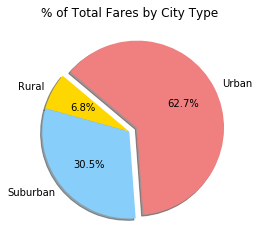

In [4]:
# Calculate Type Percents

city_types = merge_table.groupby(["type"])
total_fare = city_types['fare'].sum()

# Build Pie Chart

# Labels for the sections of our pie chart
labels = [ "Rural","Suburban","Urban"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares by City Type")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("% of Total Fares by City Type")


In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

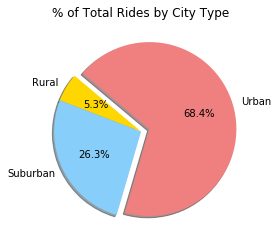

<Figure size 432x288 with 0 Axes>

In [6]:
# Calculate Ride Percents
ride_count = city_types['ride_id'].count()

# Build Pie Chart

# Labels for the sections of our pie chart
labels = [ "Rural","Suburban","Urban"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides by City Type")
plt.pie(ride_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.show()
plt.savefig("% of Total Rides by City Type")


In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

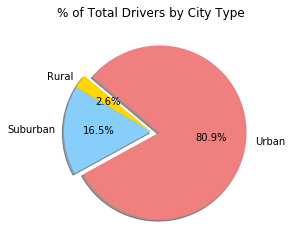

<Figure size 432x288 with 0 Axes>

In [8]:
# Calculate Ride Percents
#total_drivers = city_types['driver_count'].sum()

drivers = city_data.groupby(["type"])
drivers_total = drivers['driver_count'].sum()
# Build Pie Chart

# Labels for the sections of our pie chart
labels = [ "Rural","Suburban","Urban"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers by City Type")
plt.pie(drivers_total, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.show()
plt.savefig("% of Total Drivers by City Type")

In [9]:
# Show Figure
plt.show()

In [10]:
#Trends: 

#1. Rural fares are typically more expensive 
#2. There is a higher consentration of ridership of urban areas which decreases as move toward rural areas
#3. The more drivers available lower costs of rides